In [4]:
import pandas as pd

In [5]:
import numpy as np
import math

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
data = pd.read_csv('final_data.csv')

In [161]:
#finalx.sort(['rev_per_uv'], ascending=[0])

In [261]:
def pca_results(good_data, pca):
	'''
	Create a DataFrame of the PCA results
	Includes dimension feature weights and explained variance
	Visualizes the PCA results
	'''

	# Dimension indexing
	dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

	# PCA components
	components = pd.DataFrame(np.round(pca.components_, 4), columns = good_data.keys())
	components.index = dimensions

	# PCA explained variance
	ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
	variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
	variance_ratios.index = dimensions

	# Create a bar plot visualization
	fig, ax = plt.subplots(figsize = (14,8))

	# Plot the feature weights as a function of the components
	components.plot(ax = ax, kind = 'bar');
	ax.set_ylabel("Feature Weights")
	ax.set_xticklabels(dimensions, rotation=0)


	# Display the explained variance ratios
	for i, ev in enumerate(pca.explained_variance_ratio_):
		ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))

	# Return a concatenated DataFrame
	return pd.concat([variance_ratios, components], axis = 1)

def cluster_results(reduced_data, preds, centers, pca_samples):
	'''
	Visualizes the PCA-reduced cluster data in two dimensions
	Adds cues for cluster centers and student-selected sample data
	'''

	predictions = pd.DataFrame(preds, columns = ['Cluster'])
	plot_data = pd.concat([predictions, reduced_data], axis = 1)

	# Generate the cluster plot
	fig, ax = plt.subplots(figsize = (14,8))

	# Color map
	cmap = cm.get_cmap('gist_rainbow')

	# Color the points based on assigned cluster
	for i, cluster in plot_data.groupby('Cluster'):   
	    cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
	                 color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=30);

	# Plot centers with indicators
	for i, c in enumerate(centers):
	    ax.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', \
	               alpha = 1, linewidth = 2, marker = 'o', s=200);
	    ax.scatter(x = c[0], y = c[1], marker='$%d$'%(i), alpha = 1, s=100);

	# Plot transformed sample points 
	ax.scatter(x = pca_samples[:,0], y = pca_samples[:,1], \
	           s = 150, linewidth = 4, color = 'black', marker = 'x');

	# Set plot title
	ax.set_title("Cluster Learning on PCA-Reduced Data - Centroids Marked by Number\nTransformed Sample Data Marked by Black Cross");


def channel_results(reduced_data, outliers, pca_samples):
	'''
	Visualizes the PCA-reduced cluster data in two dimensions using the full dataset
	Data is labeled by "Channel" and cues added for student-selected sample data
	'''

	# Check that the dataset is loadable
	try:
	    full_data = pd.read_csv("customers.csv")
	except:
	    print "Dataset could not be loaded. Is the file missing?"
	    return False

	# Create the Channel DataFrame
	channel = pd.DataFrame(full_data['Channel'], columns = ['Channel'])
	channel = channel.drop(channel.index[outliers]).reset_index(drop = True)
	labeled = pd.concat([reduced_data, channel], axis = 1)
	
	# Generate the cluster plot
	fig, ax = plt.subplots(figsize = (14,8))

	# Color map
	cmap = cm.get_cmap('gist_rainbow')

	# Color the points based on assigned Channel
	labels = ['Hotel/Restaurant/Cafe', 'Retailer']
	grouped = labeled.groupby('Channel')
	for i, channel in grouped:   
	    channel.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
	                 color = cmap((i-1)*1.0/2), label = labels[i-1], s=30);
	    
	# Plot transformed sample points   
	for i, sample in enumerate(pca_samples):
		ax.scatter(x = sample[0], y = sample[1], \
	           s = 200, linewidth = 3, color = 'black', marker = 'o', facecolors = 'none');
		ax.scatter(x = sample[0]+0.25, y = sample[1]+0.3, marker='$%d$'%(i), alpha = 1, s=125);

	# Set plot title
	ax.set_title("PCA-Reduced Data Labeled by 'Channel'\nTransformed Sample Data Circled");
#plt.savefig('CustomerSegmentsClustering.png', dpi=400)

In [246]:
#limited
#xdata = finalx[['rev_per_uv', 'reach', 'searchable_job_per_js', 'searchable_job_per_uv', 'sessions', 'avg_pos', 'sem_page', 'all_page', 'sem_bounce', 'total_bounce', 'seo_growth']]
xdata_unscaled = finalx[:]

In [247]:
index_ = xdata_unscaled.index

In [248]:
cols = xdata_unscaled.columns

In [249]:
scaler = MinMaxScaler()
xdata = scaler.fit_transform(xdata_unscaled)

In [250]:
#xdata = np.transpose(xdata_)

In [251]:
np.shape(xdata)

(60, 17)

In [252]:
xdata = pd.DataFrame(xdata)
xdata.columns = cols

In [253]:
xdata['country'] = index_

In [254]:
xdata = xdata.set_index('country')

In [255]:
#xdata = final[['penetration', 'searchable_job_per_js', 'searchable_job_per_uv', 'reach', 'sessions']]
#xdata = finalx[['rev_per_uv', 'reach', 'searchable_job_per_js', 'searchable_job_per_uv']]

In [256]:
def znorm(data):
    for i in data.columns:
        data[i] = data[i].astype(float)
        data[i] = (data[i] - data[i].mean())/ data[i].std()

In [224]:
znorm(xdata)

In [257]:
xdata.keys()

Index([u'labor_force', u'total_jobs', u'penetration', u'job_seekers',
       u'searchable_job_per_js', u'uv', u'searchable_job_per_uv', u'reach',
       u'sessions', u'rev', u'rev_per_uv', u'avg_pos', u'sem_page',
       u'all_page', u'sem_bounce', u'total_bounce', u'seo_growth'],
      dtype='object')

In [258]:
np.shape(xdata)

(60, 17)

In [259]:
from sklearn.decomposition import PCA

Dimension 1     0.3703
Dimension 2     0.5447
Dimension 3     0.6659
Dimension 4     0.7640
Dimension 5     0.8198
Dimension 6     0.8649
Dimension 7     0.9007
Dimension 8     0.9330
Dimension 9     0.9630
Dimension 10    0.9784
Dimension 11    0.9910
Dimension 12    0.9946
Dimension 13    0.9970
Dimension 14    0.9984
Dimension 15    0.9992
Dimension 16    0.9997
Dimension 17    1.0000
Name: Explained Variance, dtype: float64


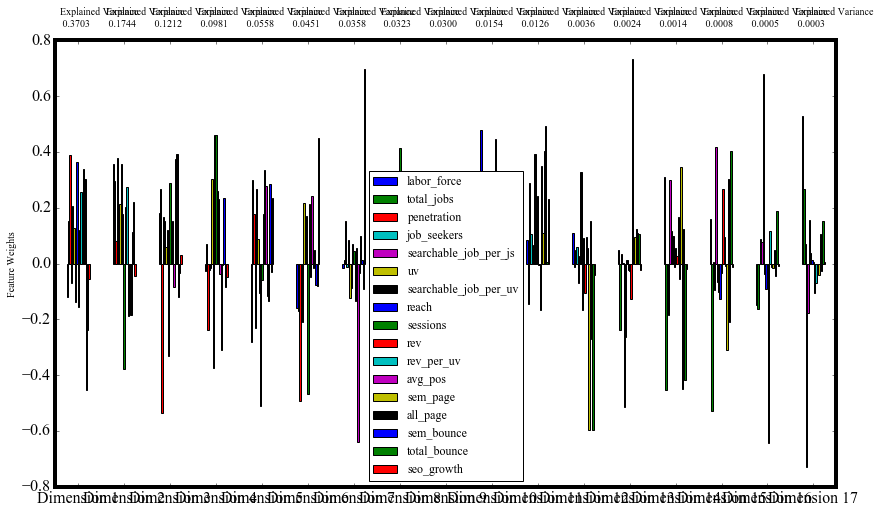

In [262]:
#pca = PCA(n_components=len(xdata.keys()))
pca = PCA(n_components=17)
pca.fit(xdata)
# Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(xdata)

# Generate PCA results plot
pca_results = pca_results(xdata, pca)
print pca_results['Explained Variance'].cumsum()

In [263]:
#reduce to two dimensions 
pca = PCA(n_components=2)
pca.fit(xdata)
reduced_data = pca.transform(xdata)

In [264]:
small = pca.transform(xdata.loc[['US',  'JP', 'UK', 'AU', 'DE', 'IN', 'ID', 'PH', 'SG'], :])

In [265]:
small

array([[ 1.09416904,  1.01688119],
       [ 1.33244748,  0.58366669],
       [ 0.89329871,  0.24321585],
       [ 0.20792371,  0.1214638 ],
       [ 0.24236889,  0.01270721],
       [-0.80655725,  0.409134  ],
       [-0.50037438, -0.14043718],
       [-0.25555467, -0.20190426],
       [ 0.07050854,  0.00312956]])

In [266]:
def unzipper(zipped, as_list=True):
    if not zipped:
        return [], []
    if not as_list:
        return zip(*zipped)
    else:
        a, b =zip(*zipped)
        return list(a), list(b)

In [267]:
x, y = unzipper(list(reduced_data))

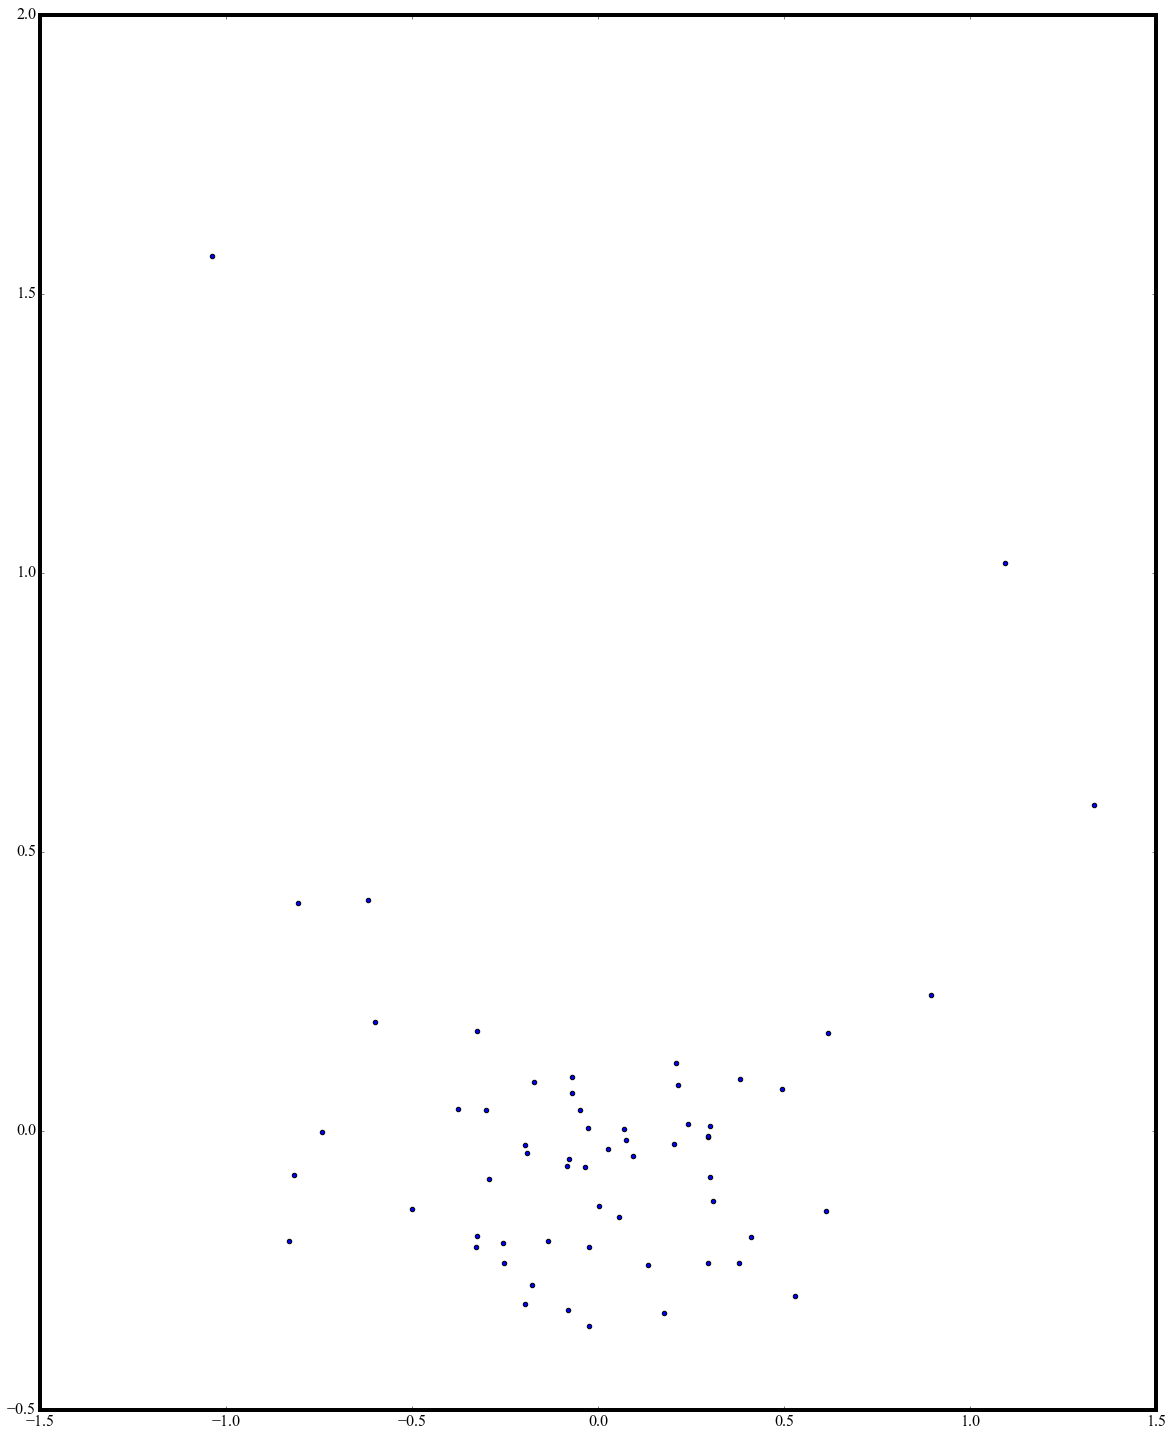

In [268]:
plt.scatter(x, y)

In [269]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GaussianMixture
for n in range(2, 11):
    clusterer = GaussianMixture(n_components = n, random_state=143)
    clusterer.fit(reduced_data)
    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    
    # Find the cluster centers
    centers = clusterer.means_
    
    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(small)
    
    # Calculate the mean silhouette coefficient for the number of clusters chosen
    from sklearn.metrics import silhouette_score
    score = silhouette_score(reduced_data, preds)
    print "For {} clusters we get a silhouette coefficient of {:0.3f}".format(n, score)

For 2 clusters we get a silhouette coefficient of 0.607
For 3 clusters we get a silhouette coefficient of 0.519
For 4 clusters we get a silhouette coefficient of 0.433
For 5 clusters we get a silhouette coefficient of 0.363
For 6 clusters we get a silhouette coefficient of 0.379
For 7 clusters we get a silhouette coefficient of 0.377
For 8 clusters we get a silhouette coefficient of 0.343
For 9 clusters we get a silhouette coefficient of 0.359
For 10 clusters we get a silhouette coefficient of 0.346


In [270]:
def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], 10.0, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    #plt.xlim(-9., 5.)
    #plt.ylim(-3., 6.)
    #plt.xticks(())
    #plt.yticks(())
    plt.title(title)

In [278]:

# Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GaussianMixture as GMM
clusterer = GMM(n_components = 4, random_state=143)
clusterer.fit(reduced_data)
# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# Find the cluster centers
centers = clusterer.means_

# Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(small)


In [279]:
len(reduced_data)

60

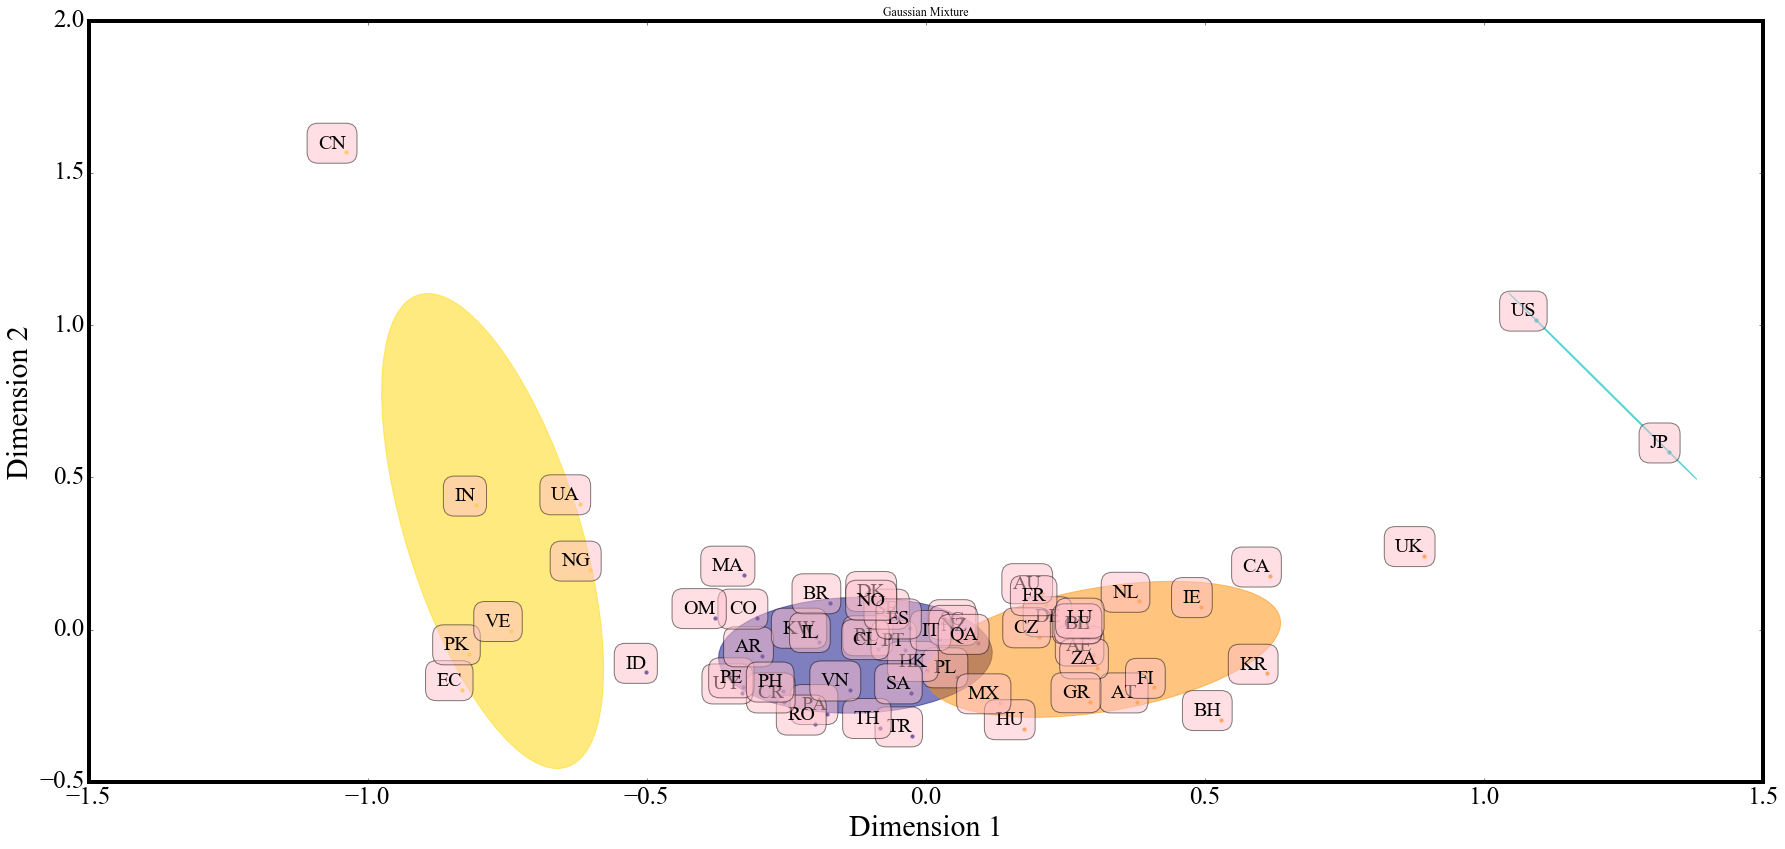

In [281]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as grd
import matplotlib.ticker as tkr
import matplotlib.font_manager as font_manager

from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import FuncFormatter
from matplotlib import rcParams

#define plotter
minorLocatorx   = AutoMinorLocator(10)
minorLocatory   = AutoMinorLocator(4)
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
matplotlib.rcParams['axes.linewidth'] = 2.
plt.rcParams['axes.linewidth'] = 4
plt.rc('font', family='serif')
plt.rc('font', serif='Times New Roman') 
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 30
plt.rcParams["figure.figsize"] = fig_size

import itertools
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl
color_iter = itertools.cycle(['navy', 'c', 'darkorange', 'gold',
                              'darkorange'])
plot_results(reduced_data, preds, clusterer.means_, clusterer.covariances_, 0,
             'Gaussian Mixture')
plt.xlabel('Dimension 1', fontsize=30)
plt.ylabel('Dimension 2', fontsize=30)
test = pd.DataFrame(reduced_data, columns=['Dimension1', 'Dimension2'])
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
test['country'] = finalx.reset_index()['country']

for label, x, y in zip(test['country'], test['Dimension1'], test['Dimension2']):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (0, 0), fontsize=20,
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.55', fc = 'pink', alpha = 0.5))

In [282]:
np.shape(reduced_data)

(60, 2)